Do your work for this exercise in a jupyter notebook named evaluate, within your regression-exercises repository. 

By the end of this exercise the overall deliverables for this exercise are an evaluate.ipynb file and an evaluate.py file.

In [1]:
# data
import wrangle

#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

1. Load your zillow dataset.

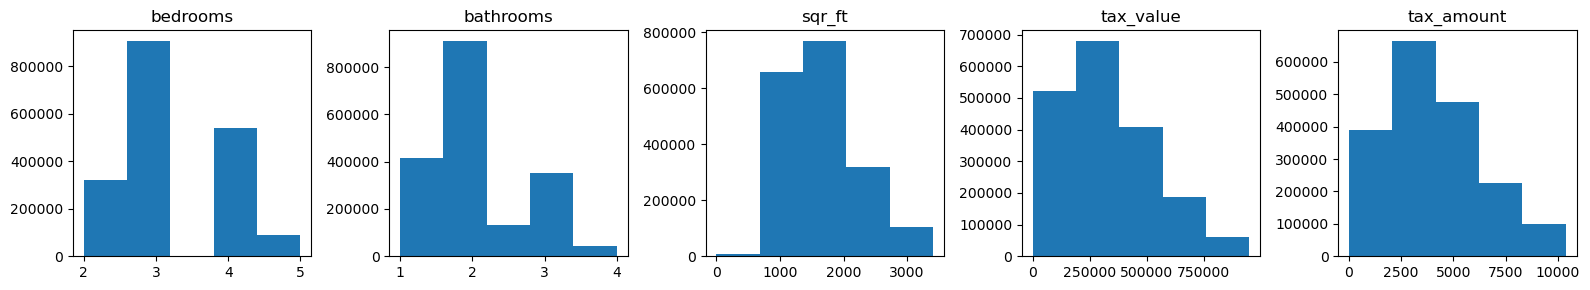

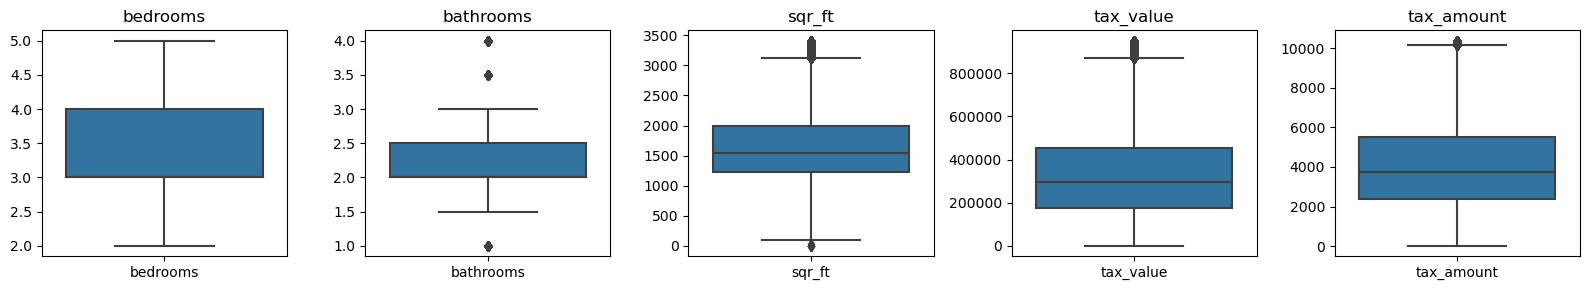

In [2]:
train, validate, test = wrangle.wrangle_zillow()

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [3]:
# create baseline
train['baseline'] = train['tax_value'].mean()

In [15]:
# imports
import statsmodels.api as sm
from statsmodels.formula.api import ols

# define X and y
X = train[['sqr_ft']]
y = train.tax_value

# fit model
model = ols('tax_value ~ sqr_ft', data=train).fit()
print(model.summary())

# compute yhat aka predictions, and add to original dataframe
train['yhat'] = model.predict(X)
train.head(3)

                            OLS Regression Results                            
Dep. Variable:              tax_value   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                 2.264e+05
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:25:29   Log-Likelihood:            -1.4048e+07
No. Observations:             1038959   AIC:                         2.810e+07
Df Residuals:                 1038957   BIC:                         2.810e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.126e+04    547.798    148.342      0.0

,bedrooms,bathrooms,sqr_ft,tax_value,year_built,tax_amount,fips,baseline,yhat
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,327962.928757,314131.125460
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,327962.928757,345309.674341
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0,327962.928757,297870.542550


3. Plot the residuals for the linear regression model that you made.

eval_env: 1


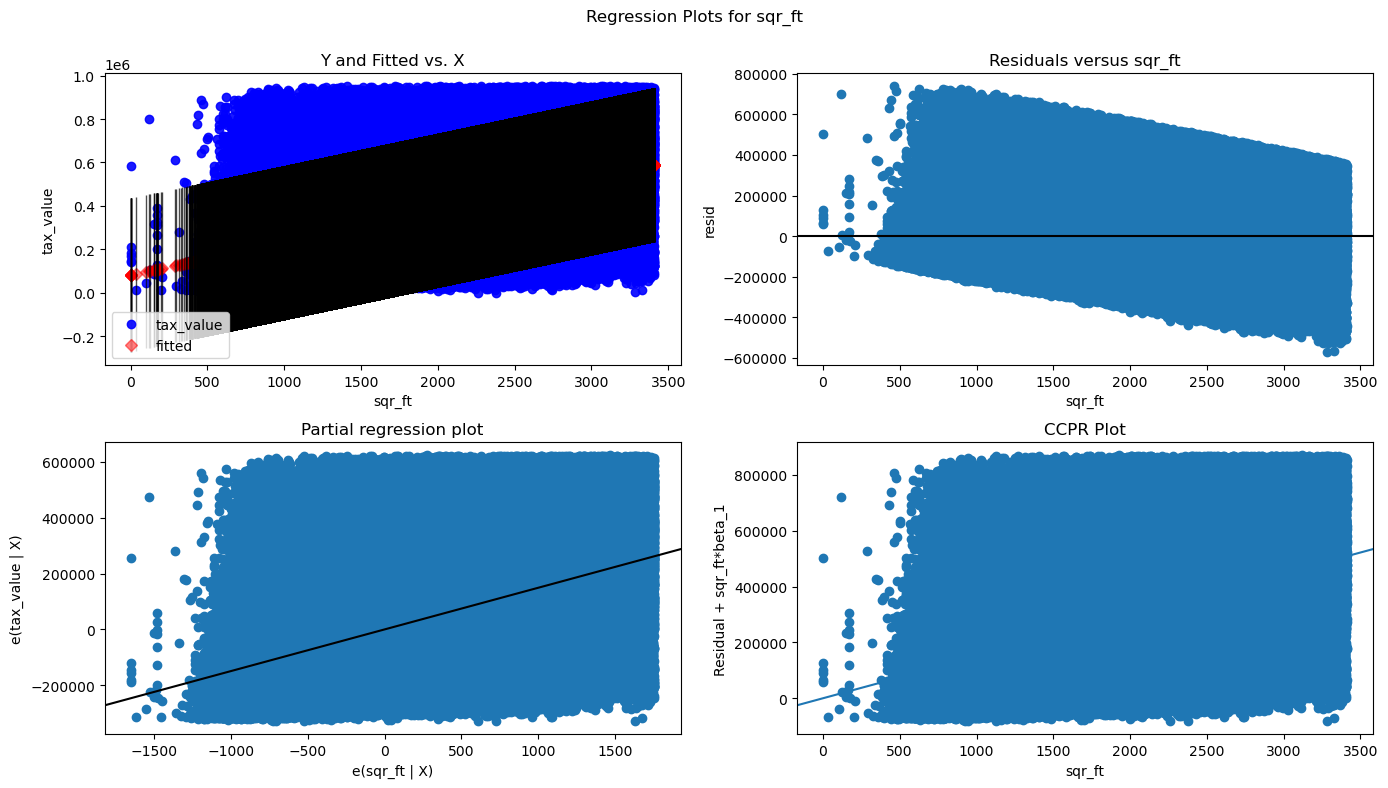

In [19]:
# visualize model
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model, 'sqr_ft', fig=fig)

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [20]:
# residual = actual - predicted
train['yhat_residual'] = y - train.yhat

In [22]:
# residual squared = (y - yhat)^2
train['residual_squared'] = train.yhat_residual**2

In [33]:
# Sum of Squared Errors = sum of squared residuals
SSE = sum(train.residual_squared)

In [34]:
# Mean Squared Error = mean of SSE
MSE = SSE/len(train)

In [35]:
# Root Mean Squared Error = sqrt of MSE
RMSE = MSE**.5

In [60]:
# Explained Sum of Squares = sum(predicted - (mean(actual)))
ESS = sum((train.yhat - y.mean())**2)

In [53]:
# Total Sum of Squares = sum(actual - (mean(actual)))
# OR (TSS = ESS + SSE)
TSS = sum((y - y.mean())**2)

In [61]:
# sum of squared errors
print(f"Sum of Squared Errors(SSE): {SSE:.8f}\n")
# mean squared error
print(f"Mean Squared Error(MSE): {MSE:.8f}\n")
# root mean squared error
print(f"Root Mean Squared Error(RMSE): {RMSE:.8f}\n")
# explained sum of squares
print(f"Explained Sum of Squares(ESS): {ESS:.8f}\n")
# total sum of squares
print(f"Total Sum of Squares(TSS): {TSS:.8f}\n")

Sum of Squared Errors(SSE): 33777310861903632.00000000

Mean Squared Error(MSE): 32510725506.88105392

Root Mean Squared Error(RMSE): 180307.30852320

Explained Sum of Squares(ESS): 7361327054840047.00000000

Total Sum of Squares(TSS): 41138637916744744.00000000



5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [62]:
# baseline residual
train['baseline_residual'] = y - train.baseline
# baseline residual squared 
train['baseline_residual_squared'] = train.baseline_residual**2

# baseline SSE
# Sum of Squared Errors = sum of squared residuals
SSE_baseline = sum(train.baseline_residual_squared)

# baseline MSE
# Mean Squared Error = mean of SSE
MSE_baseline = SSE_baseline/len(train)


# baseline RMSE
# Root Mean Squared Error = sqrt of MSE
RMSE_baseline = MSE_baseline**.5

In [63]:
# baseline sum of squared errors
print(f"Baseline Sum of Squared Errors(SSE): {SSE_baseline:.8f}\n")
# baseline mean squared error
print(f"Baseline Mean Squared Error(MSE): {MSE_baseline:.8f}\n")
# baseline root mean squared error
print(f"Baseline Root Mean Squared Error(RMSE): {RMSE_baseline:.8f}\n")

Baseline Sum of Squared Errors(SSE): 41138637916744744.00000000

Baseline Mean Squared Error(MSE): 39596016702.04959106

Baseline Root Mean Squared Error(RMSE): 198987.47875695



6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [64]:
if SSE < SSE_baseline:
    print('The model performs better than baseline')
else:
    print('The model does not perform better than the baseline')

The model performs better than baseline


7. What is the amount of variance explained in your model?

In [69]:
# compute R^2
R2 = ESS/TSS
R2

0.1789394940527127

8. Is your model better than the baseline model?

In [70]:
from sklearn.metrics import r2_score

r2_score(train.tax_value, train.yhat)

0.17893949405267473

9. Create a file named evaluate.py that contains the following functions.

    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
